<a href="https://colab.research.google.com/github/aruaru0/Foursquare-Location-Matching/blob/main/train_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/datas/kaggle.json  ~/.kaggle/

In [11]:
!pip install kaggle
!apt install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [12]:
!chmod 600 /root/.kaggle/kaggle.json

In [13]:
!mkdir input output

mkdir: cannot create directory ‘input’: File exists
mkdir: cannot create directory ‘output’: File exists


In [14]:
!kaggle competitions download -c foursquare-location-matching

 98% 156M/159M [00:01<00:00, 107MB/s]
100% 159M/159M [00:01<00:00, 111MB/s]


In [15]:
!unzip foursquare-location-matching.zip -d input/foursquare-location-matching

Archive:  foursquare-location-matching.zip
  inflating: input/foursquare-location-matching/pairs.csv  
  inflating: input/foursquare-location-matching/sample_submission.csv  
  inflating: input/foursquare-location-matching/test.csv  
  inflating: input/foursquare-location-matching/train.csv  


In [16]:
!kaggle kernels output aruaru0/training-data-for-binary-lgb-baseline-0-834 -p ./input/train_data

tcmalloc: large alloc 1212923904 bytes == 0x5ac9a000 @  0x7f93be66d1e7 0x4a3940 0x5b438c 0x5b46f7 0x59afff 0x515655 0x59a257 0x570bf0 0x511ee1 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x5134a6 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x511e2c 0x549576 0x4bca8a
Output file downloaded to ./input/train_data/train_data1.csv
tcmalloc: large alloc 1215537152 bytes == 0xa3ade000 @  0x7f93be66d1e7 0x4a3940 0x5b438c 0x5b46f7 0x59afff 0x515655 0x59a257 0x570bf0 0x511ee1 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x59c019 0x595ef6 0x5134a6 0x549576 0x4bca8a 0x5134a6 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x511e2c 0x549576 0x4bca8a
Output file downloaded to ./input/train_data/train_data2.csv
Output file downloaded to ./input/train_data/train_data3.csv
Output file downloaded to ./input/train_data/train_data4.csv
Output file downloaded to ./input/train_data/train_data5.csv
Output file d

## lightgbm

In [17]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
df1 = pd.read_csv('/content/input/train_data/train_data1.csv')
df2 = pd.read_csv('/content/input/train_data/train_data2.csv')
df3 = pd.read_csv('/content/input/train_data/train_data3.csv')
df4 = pd.read_csv('/content/input/train_data/train_data4.csv')
df5 = pd.read_csv('/content/input/train_data/train_data5.csv')

In [19]:
df = pd.concat([df1, df2, df3])
x_train = df[['kdist', 'kneighbors', 'kdist_country',
       'kneighbors_country', 'name_sim', 'name_gesh', 'name_leven',
       'name_jaro', 'name_lcs', 'name_len_diff', 'name_nleven', 'name_nlcsk',
       'name_nlcs', 'address_sim', 'address_gesh', 'address_leven',
       'address_jaro', 'address_lcs', 'address_len_diff', 'address_nleven',
       'address_nlcsk', 'address_nlcs', 'city_gesh', 'city_leven', 'city_jaro',
       'city_lcs', 'city_len_diff', 'city_nleven', 'city_nlcsk', 'city_nlcs',
       'state_sim', 'state_gesh', 'state_leven', 'state_jaro', 'state_lcs',
       'state_len_diff', 'state_nleven', 'state_nlcsk', 'state_nlcs',
       'zip_gesh', 'zip_leven', 'zip_jaro', 'zip_lcs', 'url_sim', 'url_gesh',
       'url_leven', 'url_jaro', 'url_lcs', 'url_len_diff', 'url_nleven',
       'url_nlcsk', 'url_nlcs', 'phone_gesh', 'phone_leven', 'phone_jaro',
       'phone_lcs', 'categories_sim', 'categories_gesh', 'categories_leven',
       'categories_jaro', 'categories_lcs', 'categories_len_diff',
       'categories_nleven', 'categories_nlcsk', 'categories_nlcs',
       'country_sim', 'country_gesh', 'country_leven', 'country_jaro',
       'country_lcs', 'country_len_diff', 'country_nleven', 'country_nlcsk',
       'country_nlcs']]
y_train = df['label']

In [20]:
df = df4
x_valid = df[['kdist', 'kneighbors', 'kdist_country',
       'kneighbors_country', 'name_sim', 'name_gesh', 'name_leven',
       'name_jaro', 'name_lcs', 'name_len_diff', 'name_nleven', 'name_nlcsk',
       'name_nlcs', 'address_sim', 'address_gesh', 'address_leven',
       'address_jaro', 'address_lcs', 'address_len_diff', 'address_nleven',
       'address_nlcsk', 'address_nlcs', 'city_gesh', 'city_leven', 'city_jaro',
       'city_lcs', 'city_len_diff', 'city_nleven', 'city_nlcsk', 'city_nlcs',
       'state_sim', 'state_gesh', 'state_leven', 'state_jaro', 'state_lcs',
       'state_len_diff', 'state_nleven', 'state_nlcsk', 'state_nlcs',
       'zip_gesh', 'zip_leven', 'zip_jaro', 'zip_lcs', 'url_sim', 'url_gesh',
       'url_leven', 'url_jaro', 'url_lcs', 'url_len_diff', 'url_nleven',
       'url_nlcsk', 'url_nlcs', 'phone_gesh', 'phone_leven', 'phone_jaro',
       'phone_lcs', 'categories_sim', 'categories_gesh', 'categories_leven',
       'categories_jaro', 'categories_lcs', 'categories_len_diff',
       'categories_nleven', 'categories_nlcsk', 'categories_nlcs',
       'country_sim', 'country_gesh', 'country_leven', 'country_jaro',
       'country_lcs', 'country_len_diff', 'country_nleven', 'country_nlcsk',
       'country_nlcs']]
y_valid = df['label']

In [21]:
df = df5
x_test = df[['kdist', 'kneighbors', 'kdist_country',
       'kneighbors_country', 'name_sim', 'name_gesh', 'name_leven',
       'name_jaro', 'name_lcs', 'name_len_diff', 'name_nleven', 'name_nlcsk',
       'name_nlcs', 'address_sim', 'address_gesh', 'address_leven',
       'address_jaro', 'address_lcs', 'address_len_diff', 'address_nleven',
       'address_nlcsk', 'address_nlcs', 'city_gesh', 'city_leven', 'city_jaro',
       'city_lcs', 'city_len_diff', 'city_nleven', 'city_nlcsk', 'city_nlcs',
       'state_sim', 'state_gesh', 'state_leven', 'state_jaro', 'state_lcs',
       'state_len_diff', 'state_nleven', 'state_nlcsk', 'state_nlcs',
       'zip_gesh', 'zip_leven', 'zip_jaro', 'zip_lcs', 'url_sim', 'url_gesh',
       'url_leven', 'url_jaro', 'url_lcs', 'url_len_diff', 'url_nleven',
       'url_nlcsk', 'url_nlcs', 'phone_gesh', 'phone_leven', 'phone_jaro',
       'phone_lcs', 'categories_sim', 'categories_gesh', 'categories_leven',
       'categories_jaro', 'categories_lcs', 'categories_len_diff',
       'categories_nleven', 'categories_nlcsk', 'categories_nlcs',
       'country_sim', 'country_gesh', 'country_leven', 'country_jaro',
       'country_lcs', 'country_len_diff', 'country_nleven', 'country_nlcsk',
       'country_nlcs']]
y_test = df['label']

In [22]:
train_data = lgb.Dataset(
    data=x_train, 
    label=y_train, 
)
validation_data = lgb.Dataset(
    data=x_valid, 
    label=y_valid, 
)

In [23]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 64,
    'min_data_in_leaf': 20,
    'max_depth': 7,
    'verbose': 0,
}

In [24]:
bst = lgb.train(
    params=params, 
    train_set=train_data, 
    num_boost_round=100, 
    early_stopping_rounds=20,
    valid_sets=[validation_data]
)

[1]	valid_0's binary_logloss: 0.186246
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's binary_logloss: 0.161619
[3]	valid_0's binary_logloss: 0.14432
[4]	valid_0's binary_logloss: 0.130837
[5]	valid_0's binary_logloss: 0.119826
[6]	valid_0's binary_logloss: 0.110675
[7]	valid_0's binary_logloss: 0.102923
[8]	valid_0's binary_logloss: 0.0962462
[9]	valid_0's binary_logloss: 0.0904779
[10]	valid_0's binary_logloss: 0.0854557
[11]	valid_0's binary_logloss: 0.081053
[12]	valid_0's binary_logloss: 0.0771231
[13]	valid_0's binary_logloss: 0.073694
[14]	valid_0's binary_logloss: 0.0706278
[15]	valid_0's binary_logloss: 0.0678747
[16]	valid_0's binary_logloss: 0.0654395
[17]	valid_0's binary_logloss: 0.0632901
[18]	valid_0's binary_logloss: 0.0613392
[19]	valid_0's binary_logloss: 0.0596177
[20]	valid_0's binary_logloss: 0.0580606
[21]	valid_0's binary_logloss: 0.0566658
[22]	valid_0's binary_logloss: 0.0554118
[23]	valid_0's binary_logloss: 0.0542902
[24]	valid_0's

In [30]:
y_pred = bst.predict(x_test, num_iteration=bst.best_iteration)
y_pred = y_pred.round(0)

array([9.99695020e-01, 9.99721652e-01, 9.99821755e-01, ...,
       3.88055939e-04, 3.69651091e-04, 4.27451725e-04])

In [31]:
accuracy = accuracy_score(y_pred, y_test)
print(f"accuracy score: {accuracy:0.4f}")
# accuracy score: 0.9825

accuracy score: 0.9851


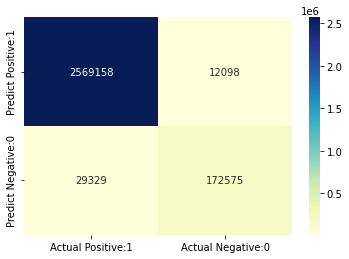

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')